<a href="https://colab.research.google.com/github/tanvirkuet/Heart-Disease-Classification/blob/master/Heart_Disease_Classification(Revised).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Heart Disease Classification(Revised Colab Version)

#### 1. Problem
Identifying Heart Disease or not from a given Dataset
#### 2. Dataset
Data is collected from KAggle https://www.kaggle.com/ronitf/heart-disease-uci
#### 3. Evaluation
we need 95% accuracy
#### 4. Feature
This is different information about Features
**Data Dictionary**
* ageage in years
* sex(1 = male; 0 = female)
* cpchest pain type
* trestbpsresting blood pressure (in mm Hg on admission to the hospital)
* cholserum cholestoral in mg/dl
* fbs(fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
* restecgresting electrocardiographic results
* thalachmaximum heart rate achieved
* exangexercise induced angina (1 = yes; 0 = no)
* oldpeakST depression induced by exercise relative to rest
* slopethe slope of the peak exercise ST segment
* canumber of major vessels (0-3) colored by flourosopy
* thal3 = normal; 6 = fixed defect; 7 = reversable defect
* target1 or 0


In [0]:
# Data handeling
import pandas as pd
import numpy as np

%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns

# For model
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV,train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier

#for evaluation
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score,recall_score,roc_curve,auc,precision_score,classification_report,plot_roc_curve
from sklearn.model_selection import cross_val_score



## Data Exploration

In [235]:
df = pd.read_csv('/content/drive/My Drive/Machine_Learning_with_python/Machine Learning Zero to Mastery ZTM/Heart_disease_binary_Classification/heart-disease.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [236]:
# is there any missing value
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [237]:
# what is data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


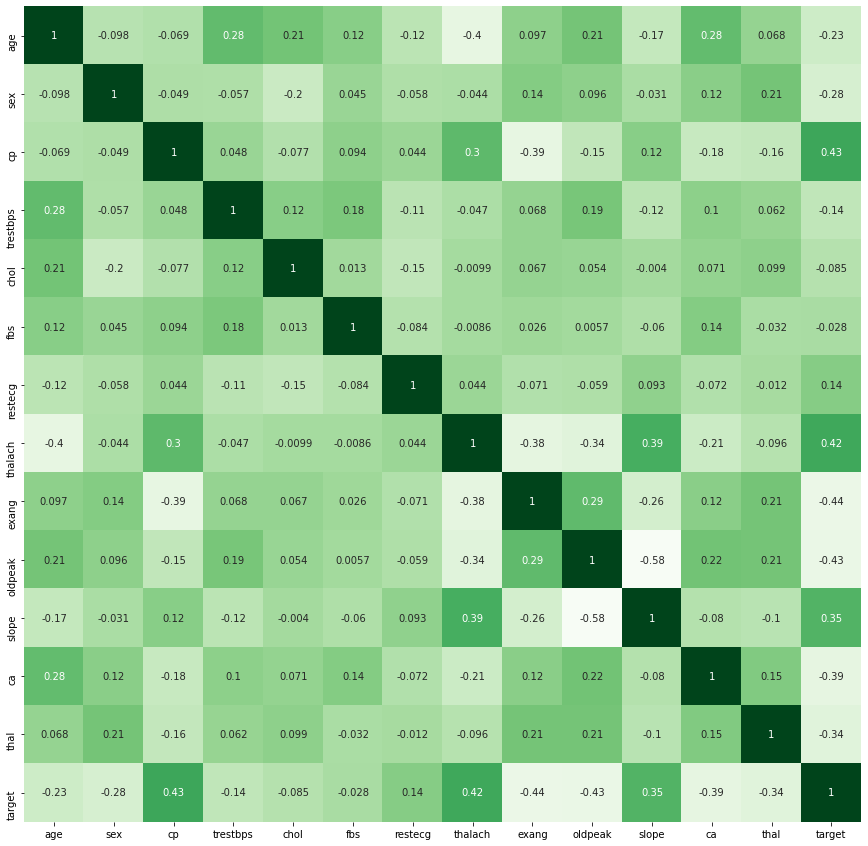

In [238]:
# Let's see the Co relation Matrix
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),
            annot=True,
            cbar=False,
            cmap="Greens");

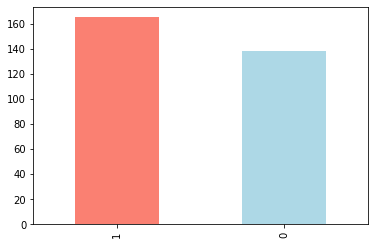

In [239]:
df['target'].value_counts().plot(kind='bar',color=['salmon','lightblue'])

Text(0.5, 0, "['0= No Disese', '1= Disease']")

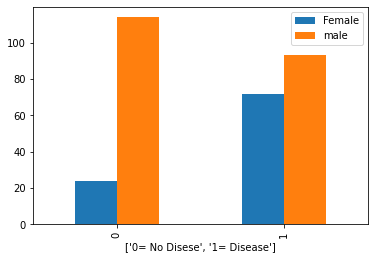

In [240]:
# Relation of disease with sex
pd.crosstab(df.target,df.sex).plot(kind='bar')
plt.legend(['Female', 'male'])
plt.xlabel(['0= No Disese', '1= Disease'])

Text(0, 0.5, 'nno of person')

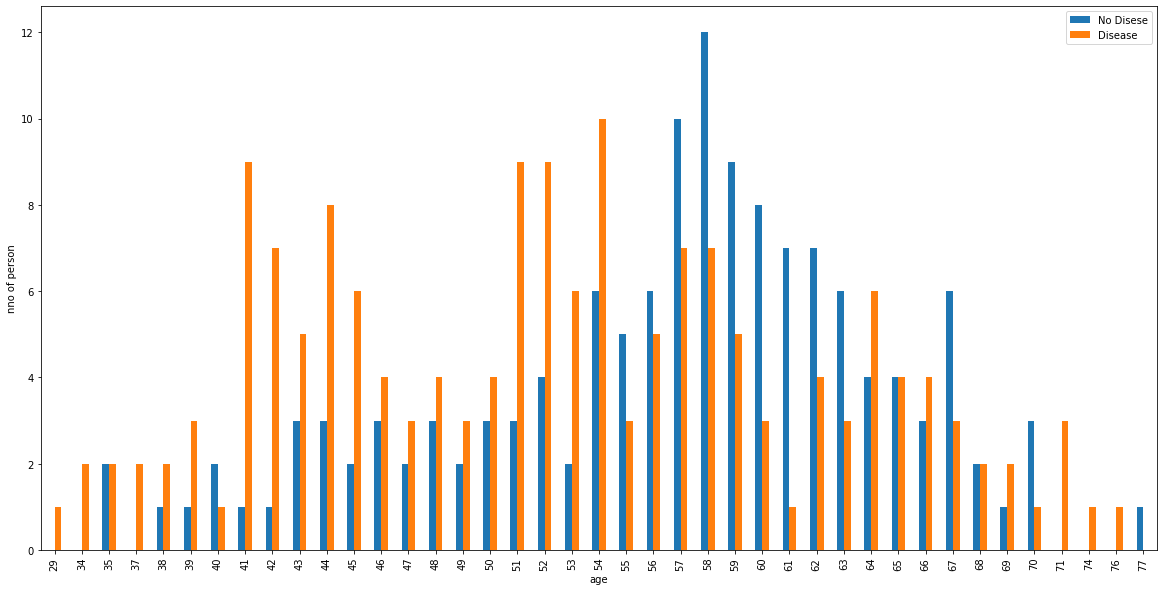

In [241]:
# Relation of disease with age
pd.crosstab(df.age,df.target).plot(kind='bar',figsize=(20,10))
plt.legend(['No Disese', 'Disease'])
plt.ylabel('nno of person')

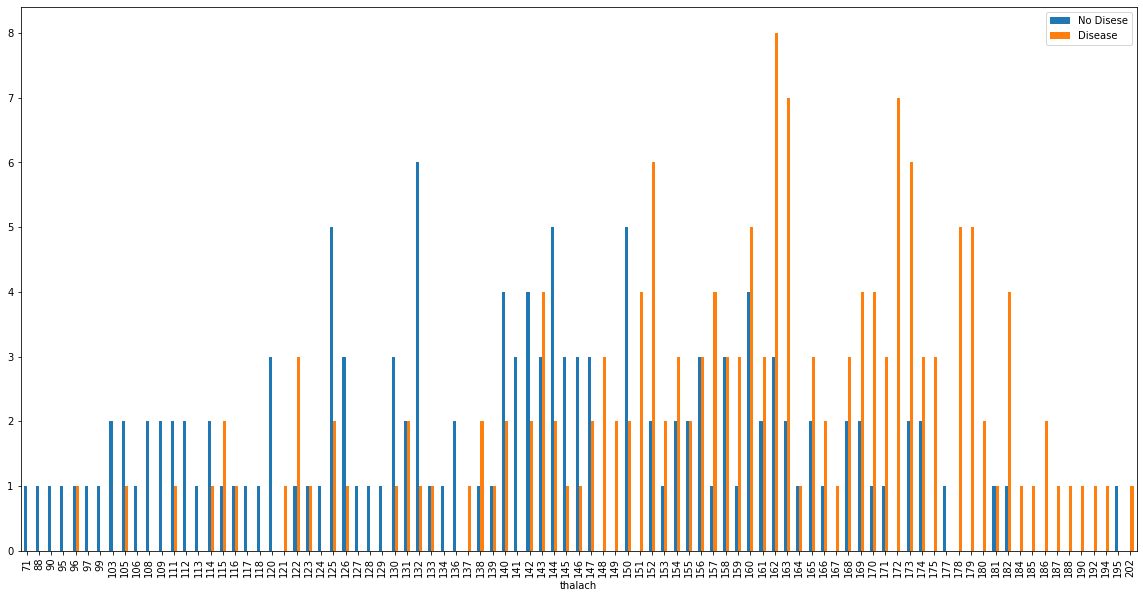

In [242]:
pd.crosstab(df.thalach,df.target).plot(kind='bar',figsize=(20,10))
plt.legend(['No Disese', 'Disease'])

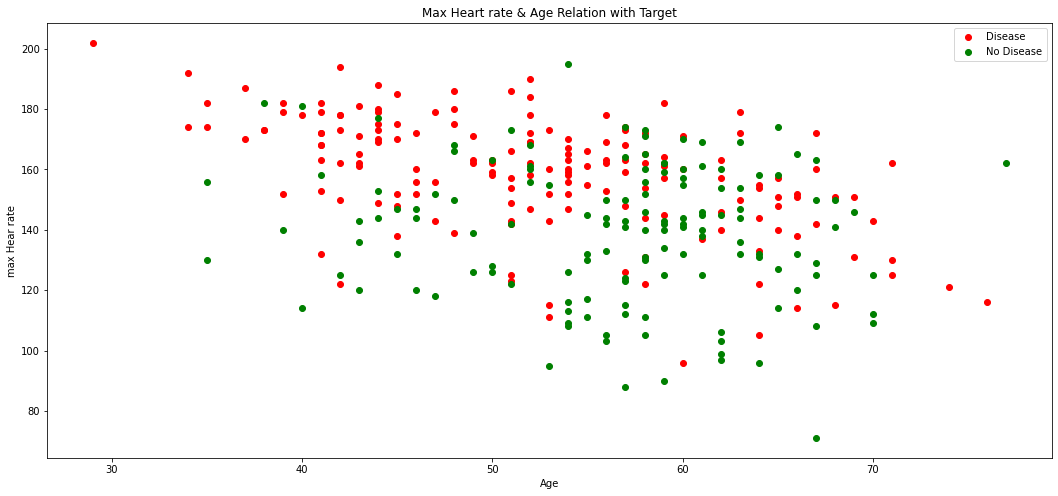

In [243]:
fig , ax0 = plt.subplots(figsize=(18,8))
scatter0 = ax0.scatter(df.age[df.target == 1],df.thalach[df.target == 1],c='red')
scatter0 = ax0.scatter(df.age[df.target == 0],df.thalach[df.target == 0],c='green')
ax0.set(xlabel='Age',ylabel='max Hear rate',title='Max Heart rate & Age Relation with Target')
ax0.legend(['Disease','No Disease'])

##### Heart disese with chest pain
3. cp - chest pain type
    * 0: Typical angina: chest pain related decrease blood supply to the heart
    * 1: Atypical angina: chest pain not related to heart
    * 2: Non-anginal pain: typically esophageal spasms (non heart related)
    * 3: Asymptomatic: chest pain not showing signs of disease


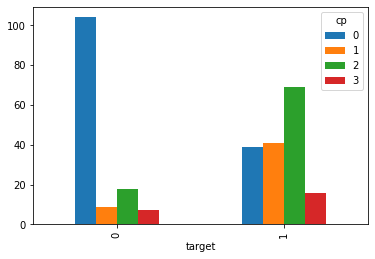

In [244]:
pd.crosstab(df.target,df.cp).plot(kind='bar')

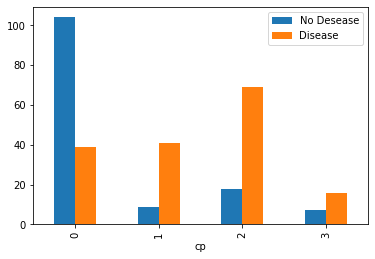

In [245]:
pd.crosstab(df.cp,df.target).plot(kind='bar')
plt.legend(['No Desease','Disease']);


## Let's Build the Model

In [0]:
np.random.seed(42)

X = df.drop('target',axis=1)
y= df['target']

# Split the data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [247]:
X_train.shape,y_train.shape, X_test.shape, y_test.shape

((242, 13), (242,), (61, 13), (61,))

#### Machine Learning MOdel

We're going to try 3 different machine learning models:
1. Logistic Regression 
2. K-Nearest Neighbours Classifier
3. Random Forest Classifier

In [0]:
model_dict = {'LogisticRegression': LogisticRegression(),
              'K-neighbors': KNeighborsClassifier(),
              'RandomForest':RandomForestClassifier(),
              'SGD':SGDClassifier()}

##### Fuction to fit and Score the model

In [0]:
def fit_and_score(model_dict,X_train, X_test, y_train, y_test):
  '''
  Will take model dictionary for different model and fit splited data to give a score dictionary
  '''
  np.random.seed(42)
  model_score = {}

  for key,model in model_dict.items():
    model.fit(X_train,y_train)
    model_score[key] = model.score(X_test,y_test)

  return model_score

In [250]:
model_scores = fit_and_score(model_dict,X_train, X_test, y_train, y_test)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [251]:
model_scores

{'K-neighbors': 0.6885245901639344,
 'LogisticRegression': 0.8852459016393442,
 'RandomForest': 0.8360655737704918,
 'SGD': 0.6885245901639344}

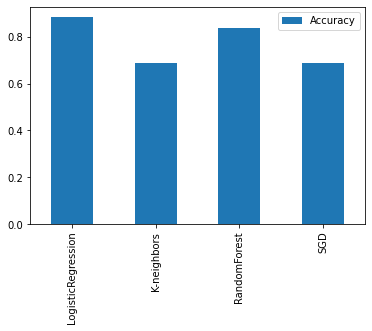

In [252]:
model_score_df = pd.DataFrame(model_scores,index=['Accuracy']) 
model_score_df.T.plot(kind='bar');                          

### Hyper parameter Tuning



#### KNN Tuning by Hand

In [253]:
np.random.seed(42)

test_score = []
for i in range(5,240,1):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train,y_train)
  score = knn.score(X_test,y_test)
  test_score.append(score)

print(f'This is the maximum score of {max(test_score)*100:.2f}%')

This is the maximum score of 75.41%


We could do more tuning but it's accuracy still below 80%. Let's move on towords oher to model

#### GridSearchCv for RandomForestClassifier

In [254]:
RandomForestClassifier().get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [0]:
rf_gs_grid = { 'n_estimators':np.arange(50,300,10),
           'max_depth': [None,10,20],
           'max_features': ['auto','sqrt'],
            'min_samples_leaf': np.arange(1,15,5),
            'min_samples_split': np.arange(1,20,5),
            'random_state': [42]
           }

In [0]:
# rf_gs_model = GridSearchCV(RandomForestClassifier(),
#                            param_grid=rf_gs_grid,
#                            cv=5,
#                            verbose=1,
#                            n_jobs=-1)

In [257]:
%%time
# rf_gs_model.fit(X_train,y_train)

CPU times: user 5 µs, sys: 0 ns, total: 5 µs
Wall time: 27.4 µs


In [0]:
# rf_gs_model.best_params_

In [259]:
np.random.seed(42)
rf_model_with_best_params = RandomForestClassifier(n_estimators=90 ,
                                 max_depth=None,
                                  max_features='auto',
                                   min_samples_leaf=11 ,
                                    min_samples_split=6
                                     )
rf_model_with_best_params.fit(X_train,y_train)
rf_model_with_best_params.score(X_test,y_test)

0.8688524590163934

#### GridSearchcv for LogisticRegression
Improvement is very less fom our base line model. Let's try `LogisticRegression()`

In [0]:
# grid for LOgistics REgression
log_reg_grid = {'C':np.logspace(-4, 4, 50),
                'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'] }

In [0]:
log_gs_model =  GridSearchCV(LogisticRegression(),
                             param_grid=log_reg_grid,
                             n_jobs=-1,
                             cv=5,
                             verbose=1)



In [262]:
log_gs_model.fit(X_train,y_train)

Fitting 5 folds for each of 250 candidates, totalling 1250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 330 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-1)]: Done 1250 out of 1250 | elapsed:   17.0s finished
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': array([1.00000000e-04, 1.456...
       7.54312006e+01, 1.09854114e+02, 1.59985872e+02, 2.32995181e+02,
       3.39322177e+02, 4.94171336e+02, 7.19685673e+02, 1.04811313e+03,
       1.52641797e+03, 2.22299648e+03, 3.23745754e+03, 4.71486636e+03,
       6.86648845e+03, 1.00000000e+04]),
                         'solver': ['n

In [263]:
log_gs_model.best_params_

{'C': 0.18420699693267145, 'solver': 'lbfgs'}

In [264]:
log_gs_model.score(X_test,y_test)

0.8852459016393442

## Evaluation
Our `LogisticRegreesion()` model is performoing better in everyway. Lets use this model for further Evaluation


* ROC curve and AUC score
* Confusion matrix
* Classification report
* Precision
* Recall
* F1-score

... and it would be great if cross-validation was used where possible.

To make comparisons and evaluate our trained model, first we need to make predictions.

In [0]:
final_model = log_gs_model

#### ROC & AUC

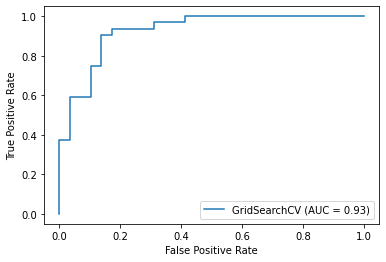

In [266]:
# ROC and AUC
plot_roc_curve(final_model,X_test,y_test);

In [0]:
y_preds = final_model.predict(X_test)

#### Confusion Matrix

In [270]:
confusion_matrix(y_test,y_preds)

array([[25,  4],
       [ 3, 29]])

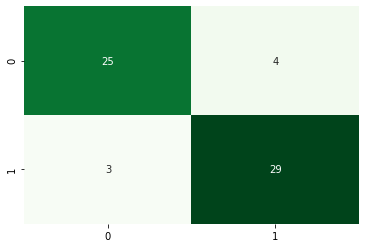

In [274]:
sns.heatmap(confusion_matrix(y_test,y_preds),annot=True,cbar=False,cmap="Greens");
# Green is True value

#### Classification Report


In [275]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



### Cross Validation `scoring` Parameter
for this pupose make our model with the best param from GridSearch again

In [0]:
# Fitting model with best parameter from Grid Search
model = LogisticRegression(C= 0.18420699693267145, solver= 'lbfgs')

In [285]:
cv_accuracy = cross_val_score(model,
                              X,
                              y,
                              cv=10,
                              verbose=1,
                              scoring='accuracy')

cv_precision = cross_val_score(model,
                              X,
                              y,
                              cv=10,
                              verbose=1,
                              scoring='precision')

cv_f1 = cross_val_score(model,
                              X,
                              y,
                              cv=10,
                              verbose=1,
                              scoring='f1')

cv_recall = cross_val_score(model,
                              X,
                              y,
                              cv=10,
                              verbose=1,
                              scoring='recall')


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
 

In [0]:
accuracy = np.mean(cv_accuracy)
precision = np.mean(cv_precision)
recall = np.mean(cv_recall)
f1 = np.mean(cv_f1)


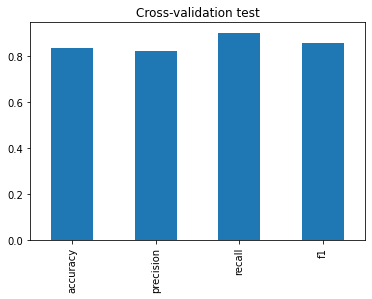

In [297]:
cross_validation_scoring_df = pd.DataFrame({'accuracy':accuracy,
                                            'precision':precision,
                                            'recall':recall,
                                            'f1':f1},
                                           index=['CV_mean_scoring'])

cross_validation_scoring_df.T.plot(kind='bar',title='Cross-validation test',legend=False)

## Feature Importance
Feature importance is another as asking, "which features contributed most to the outcomes of the model and how did they contribute?"

Finding feature importance is different for each machine learning model. One way to find feature importance is to search for "(MODEL NAME) feature importance".

Let's find the feature importance for our LogisticRegression model...

In [298]:
model.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=0.18420699693267145, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [299]:
model.coef_

array([[ 0.00274787, -0.81160563,  0.65892942, -0.01150724, -0.00153238,
         0.02125004,  0.31070372,  0.02443534, -0.5794741 , -0.56412188,
         0.43435352, -0.61320632, -0.67164   ]])

In [302]:
feature_importance = dict(zip(X_train.columns,model.coef_[0]))
feature_importance

{'age': 0.0027478718368380527,
 'ca': -0.6132063214617247,
 'chol': -0.0015323820232473904,
 'cp': 0.6589294199100809,
 'exang': -0.5794741017113209,
 'fbs': 0.02125004074196701,
 'oldpeak': -0.5641218769756952,
 'restecg': 0.31070371564210164,
 'sex': -0.8116056282761528,
 'slope': 0.4343535182863245,
 'thal': -0.6716400043450714,
 'thalach': 0.024435337563810708,
 'trestbps': -0.01150724179030954}

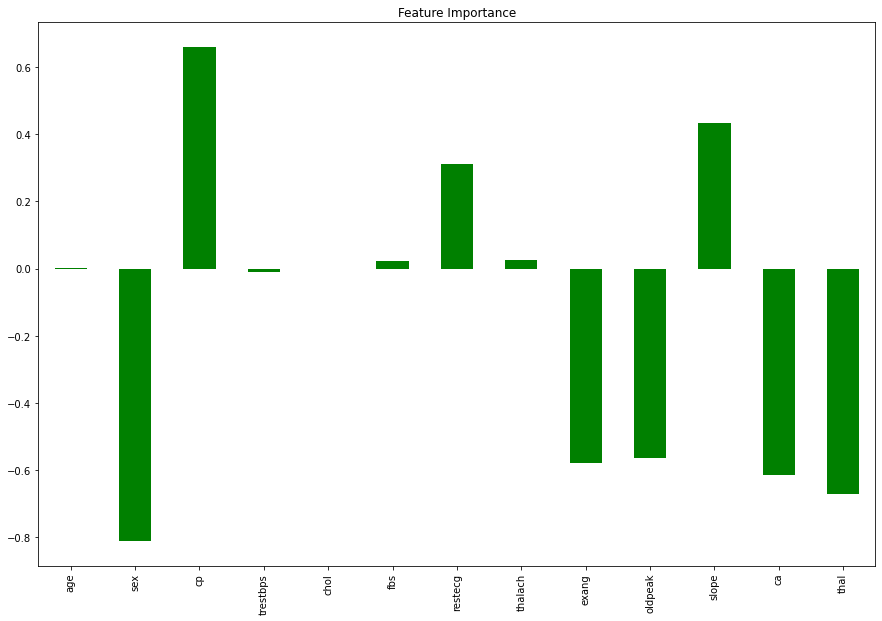

In [312]:
pd.DataFrame(feature_importance,index=['feature_imp']).T.plot(kind= 'bar',figsize=(15,10),title='Feature Importance',legend=False,color='green');

## 6. Experimentation


* Could you collect more data?
* Could you try a better model? Like CatBoost or XGBoost?
* Could you improve the current models? (beyond what I've done so far)
* If your model is good enough how would you export it and share it with others?

## Saving & Loading our model

In [0]:
import pickle
pickle.dump(model,open('/content/drive/My Drive/Machine_Learning_with_python/Machine Learning Zero to Mastery ZTM/Heart_disease_binary_Classification/heart-disease-prediction(revised).pkl','wb'))

In [0]:
load_model = pickle.load(open('/content/drive/My Drive/Machine_Learning_with_python/Machine Learning Zero to Mastery ZTM/Heart_disease_binary_Classification/heart-disease-prediction(revised).pkl','rb'))

In [318]:
X_test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
179,57,1,0,150,276,0,0,112,1,0.6,1,1,1
228,59,1,3,170,288,0,0,159,0,0.2,1,0,3
111,57,1,2,150,126,1,1,173,0,0.2,2,1,3
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3
60,71,0,2,110,265,1,0,130,0,0.0,2,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
249,69,1,2,140,254,0,0,146,0,2.0,1,3,3
104,50,1,2,129,196,0,1,163,0,0.0,2,0,2
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
193,60,1,0,145,282,0,0,142,1,2.8,1,2,3


In [317]:
load_model.predict(X_test)

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [321]:
np.array(y_test)

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])